In [ ]:
# from collections import Counter
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from wordcloud import WordCloud

# nltk.download('punkt')
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

In [1]:

import json
import pandas as pd
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')

In [2]:
# import requests
# import json
# import os

# # Define the base URL and parameters for the dataset
# base_url = "https://datasets-server.huggingface.co/rows"
# dataset = "AGBonnet/augmented-clinical-notes"
# config = "default"
# split = "train"
# offset = 0
# length = 100

# # Directory to save the data
# output_dir = "augmented_clinical_notes"
# os.makedirs(output_dir, exist_ok=True)

# # Function to download a chunk of data
# def download_chunk(offset, length):
#     url = f"{base_url}?dataset={dataset}&config={config}&split={split}&offset={offset}&length={length}"
#     response = requests.get(url)
#     return response.json()

# # Determine the total number of rows
# initial_data = download_chunk(offset, 1)
# total_rows = 200

# # Download and save all data in chunks
# all_data = []
# while offset < total_rows:
#     chunk_data = download_chunk(offset, length)
#     all_data.extend(chunk_data['rows'])
#     offset += length
#     print(f"Downloaded {offset} of {total_rows} rows")

# # Save the combined data to a JSON file
# output_file = os.path.join(output_dir, "all_data.json")
# with open(output_file, "w") as f:
#     json.dump(all_data, f)

# print(f"All data downloaded and saved to {output_file}")

In [3]:
import json
import pandas as pd


df = pd.read_json('./augmented_notes_30k.jsonl',lines=True)

In [4]:
df.columns
df.drop(columns= ["full_note"], inplace= True)
order= ['idx','note', 'conversation' , 'summary']
df= df[order]

In [5]:
# df.drop(columns= ["full_note"], inplace= True)
print(df.shape)
df.head(7)

(30000, 4)


,idx,note,conversation,summary
0,155216,"A a sixteen year-old girl, presented to our Ou...","Doctor: Good morning, what brings you to the O...","{\n""visit motivation"": ""Discomfort in the neck..."
1,77465,This is the case of a 56-year-old man that was...,"Doctor: Hi, how are you feeling today?\nPatien...","{\n""visit motivation"": ""Complaints of a dull p..."
2,133948,A 36-year old female patient visited our hospi...,"Doctor: Hello, what brings you to the hospital...","{\n""visit motivation"": ""Pain and restricted ra..."
3,80176,A 49-year-old male presented with a complaint ...,"Doctor: Good morning, Mr. [Patient's Name]. I'...","{\n""visit motivation"": ""Pain in the left proxi..."
4,72232,A 47-year-old male patient was referred to the...,"Doctor: Good morning, how are you feeling toda...","{\n""visit motivation"": ""Recurrent attacks of p..."
5,31864,A 24-year-old Yemeni female presented to the e...,"Doctor: Good morning, how are you feeling toda...","{\n""visit motivation"": ""Inability to walk and ..."
6,26809,We report a 24-day-old female baby who present...,"Doctor: Hi there, I am Dr. Smith. How can I he...","{\n""visit motivation"": ""Presented with dyspnea..."


In [8]:
pd.set_option('display.max_colwidth', None)
# print(df.iloc[26].T)
df.head(1)
# pd.reset_option('display.max_colwidth')

,idx,note,conversation,summary
0,155216,"A a sixteen year-old girl, presented to our Outpatient department with the complaints of discomfort in the neck and lower back as well as restriction of body movements. She was not able to maintain an erect posture and would tend to fall on either side while standing up from a sitting position. She would keep her head turned to the right and upwards due to the sustained contraction of the neck muscles. There was a sideways bending of the back in the lumbar region. To counter the abnormal positioning of the back and neck, she would keep her limbs in a specific position to allow her body weight to be supported. Due to the restrictions with the body movements at the neck and in the lumbar region, she would require assistance in standing and walking. She would require her parents to help her with daily chores, including all activities of self-care.\nShe had been experiencing these difficulties for the past four months since when she was introduced to olanzapine tablets for the control of her exacerbated mental illness. This was not her first experience with this drug over the past seven years since she had been diagnosed with bipolar affective disorder. Her first episode of the affective disorder was that of mania at the age of eleven which was managed with the use of olanzapine tablets in 2.5–10 mg doses per day at different times. The patient developed pain and discomfort in her neck within the second week of being put on tablet olanzapine at a dose of 5 mg per day. This was associated with a sustained and abnormal contraction of the neck muscles that would pull her head to the right in an upward direction. These features had persisted for the first three years of her illness with a varying intensity, distress, and dysfunction which would tend to correlate with the dose of olanzapine. Apart from a brief period of around three weeks when she was given tablet trihexyphenidyl 4 mg per day for rigidity in her upper limbs, she was not prescribed any other psychotropic medication. The rigidity showed good response to this medication which was subsequently","Doctor: Good morning, what brings you to the Outpatient department today?\nPatient: Good morning doctor, I have some discomfort in my neck and lower back, and I'm not able to maintain an erect posture.\nDoctor: Hmm, okay. Can you tell me more about the discomfort?\nPatient: Yes, I tend to fall on either side when I stand up from a sitting position, and my head is always turned to the right and upwards.\nDoctor: I see. Are you experiencing any pain in your neck?\nPatient: Yes, I have pain and discomfort in my neck.\nDoctor: Okay. And what about your back?\nPatient: There is a sideways bending in my lumbar region. To counter the abnormal positioning of my back and neck, I have to keep my limbs in a specific position to allow my body weight to be supported.\nDoctor: I understand. Does this restriction of body movements affect your daily life?\nPatient: Yes, I need assistance in standing and walking, and my parents have to help me with my daily chores, including all activities of self-care.\nDoctor: I see. How long have you been experiencing these difficulties?\nPatient: I've been experiencing these difficulties for the past four months since I was introduced to olanzapine tablets for the control of my exacerbated mental illness.\nDoctor: I see. And you've been diagnosed with bipolar affective disorder, correct?\nPatient: Yes, I was diagnosed with bipolar affective disorder seven years ago.\nDoctor: And you've been taking olanzapine for your mental illness for seven years, correct?\nPatient: Yes, I have. My first episode of the affective disorder was mania when I was eleven, and I've been taking olanzapine tablets in 2.5-10 mg doses per day at different times.\nDoctor: I see. So, you developed pain and discomfort in your neck within the second week of being put on olanzapine at a dose of 5 mg per day, correct?\nPatient: Yes, that's correct. The 

The patient’s **hemodynamics was stable** on initial examination. **Laboratory parameters were normal**. Abdominal ultrasonography revealed normal ovaries and no fluid in the abdominal cavity. **A vaginal examination revealed no bleeding**. The patient underwent emergency surgery, but no active bleeding focus was detected. *The right internal iliac artery was totally obstructed by the coil*, causing intermittent bleeding after partial intraoperative ligation.

In [18]:
pd.reset_option('display.max_colwidth')

# Exploratory Data Analysis

## 1. Overview of the data

In [25]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
print(f"Data types {df.dtypes}")

Dataset contains 30000 rows and 4 columns
Data types idx              int64
note            object
conversation    object
summary         object
dtype: object


In [31]:
# missing data analysis
missing_values= df.isnull().sum()
print(f"missing values:{missing_values}")

missing values:idx             0
note            0
conversation    0
summary         0
dtype: int64


## 2. Text Data Analysis

In [36]:
# Sample textual column
text_column = 'note'

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Preprocess all text
df['processed_text'] = df[text_column].apply(preprocess_text)
df['processed_text'] 

0        [sixteen, girl, presented, outpatient, departm...
1        [case, man, complaining, dump, pain, right, ba...
2        [old, female, patient, visited, hospital, chie...
3        [male, presented, complaint, pain, left, proxi...
4        [male, patient, referred, rheumatology, clinic...
                               ...                        
29995    [male, admitted, emergency, department, ed, cm...
29996    [man, kg, cm, diagnosed, falcine, meningioma, ...
29997    [man, past, medical, history, brought, hospita...
29998    [woman, visited, clinic, due, mass, right, thi...
29999    [male, significant, past, medical, history, pr...
Name: processed_text, Length: 30000, dtype: object

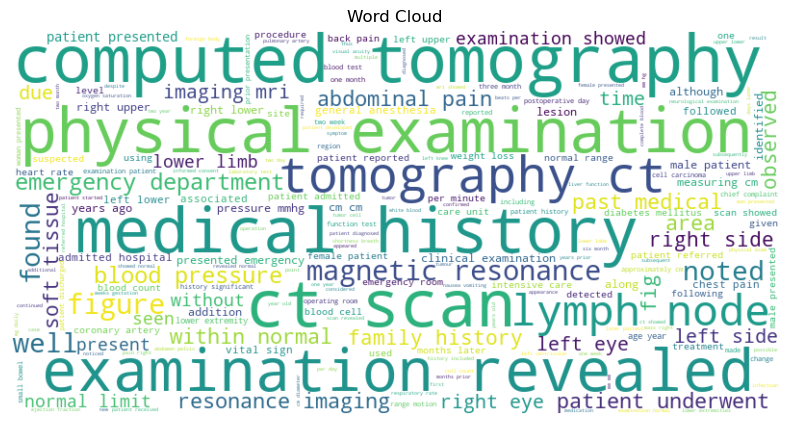

In [98]:
# Assuming 'processed_text' is a column in your DataFrame containing lists of words
all_words = [word for tokens in df['processed_text'] for word in tokens]

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

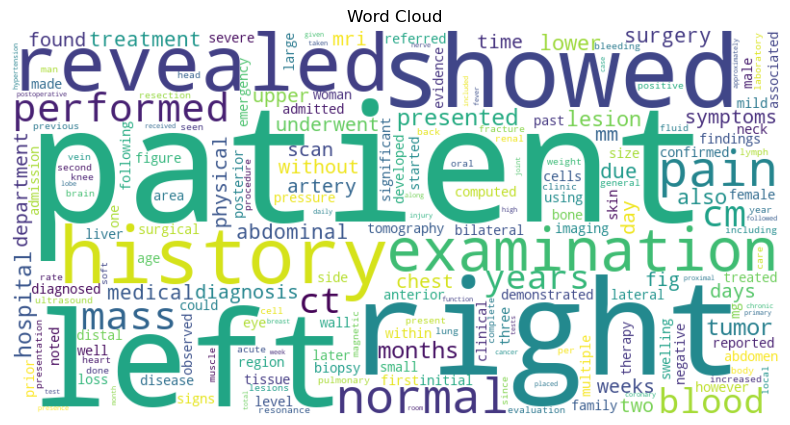

               Word  Count
91          patient  85125
242            left  52451
29            right  52339
124          showed  38278
335         history  34889
...             ...    ...
38345    ribociclib      1
12498        maxima      1
38341  multisurface      1
38340         gizan      1
55017       outlier      1

[55018 rows x 2 columns]


In [106]:
# Count the frequency of each word
word_counts = Counter(all_words)

# Convert the word counts to a DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Display the word counts
print(word_counts_df)

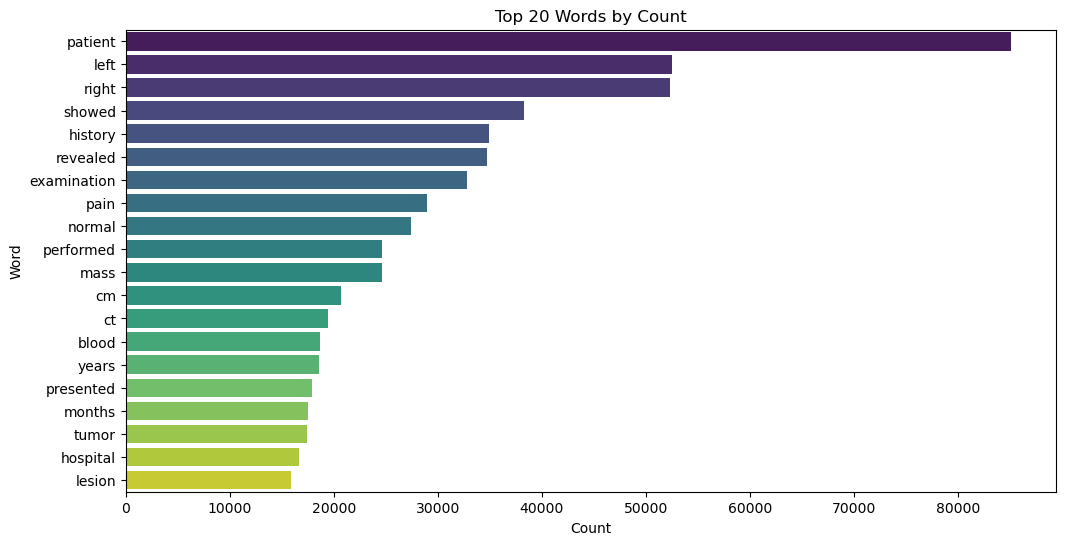

In [150]:
# Bar plot for the top 20 word frequency

# Sort the DataFrame by 'Count' in descending order and get the top 20 words
top_20_words = word_counts_df.sort_values(by='Count', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
bar_plot=sns.barplot(x='Count', y='Word', data=top_20_words, palette='viridis')
plt.title('Top 20 Words by Count')
plt.xlabel('Count')
plt.ylabel('Word')

# # Add count labels on top of each bar
# for index, row in top_20_words.iterrows():
#     bar_plot.text(row['Count'], index, str(row['Count']), color='black', ha="center")
#     bar_plot.text(row['Count'], index, f"{row['Count']:,.0f}", color='black', va='bottom', ha='center')

# # # Add count labels on top of each bar
# # for index, row in top_20_words.iterrows():
# #     bar_plot.text(row['Count'], index, str(row['Count']), color='black')
    
plt.show();

## 3. Topic Modelling LDA

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert processed text to strings
df['processed_text_str'] = df['processed_text'].apply(lambda x: ' '.join(x))

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_vectors = vectorizer.fit_transform(df['processed_text_str'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_vectors)

# Display the top words in each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 1:
mass right showed lesion patient tumor cm left revealed examination
Topic 2:
patient pain left right fracture knee performed joint bone surgery
Topic 3:
left right patient revealed showed artery examination eye history mm
Topic 4:
patient left right performed abdominal showed revealed ct cm tumor
Topic 5:
patient history normal blood symptoms years pain examination days hospital


## 4. Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...


                                                note  sentiment
0  A a sixteen year-old girl, presented to our Ou...    -0.9738
1  This is the case of a 56-year-old man that was...    -0.9703
2  A 36-year old female patient visited our hospi...    -0.9880
3  A 49-year-old male presented with a complaint ...    -0.8847
4  A 47-year-old male patient was referred to the...    -0.9648


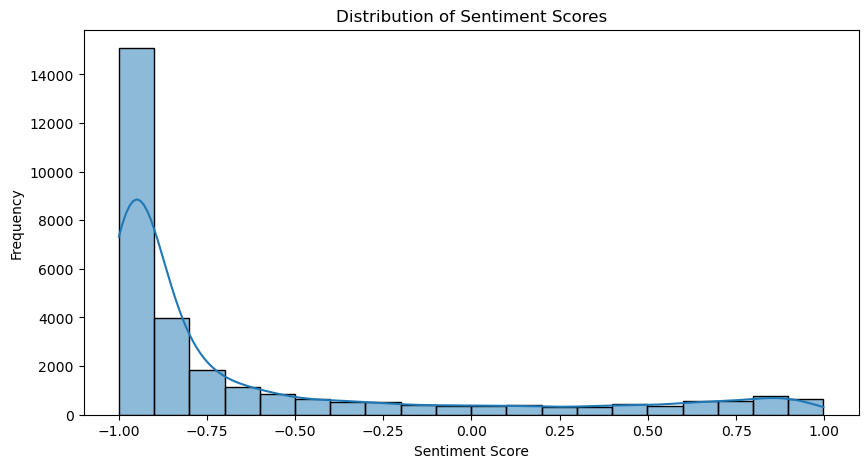

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment'] = df['note'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Display the sentiment scores
print(df[['note', 'sentiment']].head())

# Visualization of Sentiment Scores
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()



Sentiment Counts:
negative    25286
positive     4714
Name: sentiment_class, dtype: int64


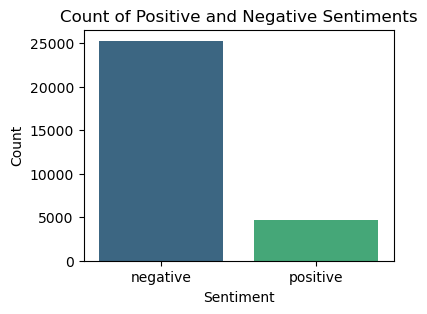

In [80]:
# visualize the sentiment polarity 

df_senti= df[['note', 'sentiment']]

# Classify sentiments
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x >= 0 else 'negative')

# Count the number of positive and negative sentiments
sentiment_counts = df['sentiment_class'].value_counts()

# Display the classified sentiments and their counts
# print(df[['note', 'sentiment', 'sentiment_class']])
print("\nSentiment Counts:")
print(sentiment_counts)

# Bar plot of sentiment counts
plt.figure(figsize=(4, 3))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Count of Positive and Negative Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
